# Test Transformer & Trainer

In this notebook, I will test my implementation of Transformer and Trainer

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torch.nn as nn
import torch.nn.functional as F

from src.lion.lion import Lion
from src.transformer.transformer import Transformer
from src.training.trainer import train_transformer

device = torch.device('cpu')

In [2]:
from torch.utils.data import Dataset, DataLoader

NUM_NUMS = 8192
SEQ_LENGTH = 4

class NumberSeqDataset(Dataset):
    def __init__(self):
        self.data = torch.arange(NUM_NUMS)
        self.seq_length = SEQ_LENGTH
    
    def __getitem__(self, idx):
        src = self.data[idx:idx+self.seq_length]
        tgt = self.data[idx+1:idx+self.seq_length+1]
        return dict(src=src, tgt=tgt)

    def __len__(self):
        return len(self.data) - self.seq_length

In [3]:
from torch.utils.data import random_split

ds = NumberSeqDataset()
N = len(ds)
L = int(0.8 * N)
R = N - L
train_ds, eval_ds = random_split(ds, [L, R])

train_dataloader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dataloader = DataLoader(eval_ds, batch_size=32, shuffle=False)

In [4]:
model = Transformer(
    num_layers=4,
    d_model=16,
    num_heads=8,
    d_ff=32,
    input_dim=NUM_NUMS,
    output_dim=NUM_NUMS,
    max_len=16
)

In [5]:
NUM_EPOCHS = 100

history = train_transformer(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    optimizer_class=Lion,
    device=device,
    metrics_fn=lambda preds, targets: 100 * (preds == targets).float().mean().item()
)

Validation: 100%|██████████| 52/52 [00:00<00:00, 86.90it/s]


Epoch 1/100: Train Loss: 9.1614, Val Loss: 9.1208
Val metrics: 0.0


Validation: 100%|██████████| 52/52 [00:00<00:00, 82.33it/s]


Epoch 2/100: Train Loss: 9.0008, Val Loss: 9.0123
Val metrics: 0.06105006323195994


Validation: 100%|██████████| 52/52 [00:00<00:00, 88.58it/s]


Epoch 3/100: Train Loss: 8.8327, Val Loss: 8.8978
Val metrics: 0.06105006323195994


Validation: 100%|██████████| 52/52 [00:00<00:00, 77.24it/s]


Epoch 4/100: Train Loss: 8.6630, Val Loss: 8.7814
Val metrics: 0.06105006323195994


Validation: 100%|██████████| 52/52 [00:00<00:00, 83.94it/s]


Epoch 5/100: Train Loss: 8.4775, Val Loss: 8.6597
Val metrics: 0.08140008430927992


Validation: 100%|██████████| 52/52 [00:00<00:00, 85.60it/s]


Epoch 6/100: Train Loss: 8.2904, Val Loss: 8.5354
Val metrics: 0.06105006323195994


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.23it/s]


Epoch 7/100: Train Loss: 8.0928, Val Loss: 8.4083
Val metrics: 0.10175009956583381


Validation: 100%|██████████| 52/52 [00:00<00:00, 83.62it/s]


Epoch 8/100: Train Loss: 7.8916, Val Loss: 8.2752
Val metrics: 0.10175009956583381


Validation: 100%|██████████| 52/52 [00:00<00:00, 82.06it/s]


Epoch 9/100: Train Loss: 7.6885, Val Loss: 8.1374
Val metrics: 0.12210012646391988


Validation: 100%|██████████| 52/52 [00:00<00:00, 74.55it/s]


Epoch 10/100: Train Loss: 7.4863, Val Loss: 7.9914
Val metrics: 0.14245014172047377


Validation: 100%|██████████| 52/52 [00:00<00:00, 75.78it/s]


Epoch 11/100: Train Loss: 7.2779, Val Loss: 7.8389
Val metrics: 0.18315018387511373


Validation: 100%|██████████| 52/52 [00:00<00:00, 93.51it/s]


Epoch 12/100: Train Loss: 7.0740, Val Loss: 7.6786
Val metrics: 0.26455025654286146


Validation: 100%|██████████| 52/52 [00:00<00:00, 96.76it/s]


Epoch 13/100: Train Loss: 6.8707, Val Loss: 7.5162
Val metrics: 0.3256003372371197


Validation: 100%|██████████| 52/52 [00:00<00:00, 82.60it/s]


Epoch 14/100: Train Loss: 6.6664, Val Loss: 7.3485
Val metrics: 0.44770045205950737


Validation: 100%|██████████| 52/52 [00:00<00:00, 95.08it/s]


Epoch 15/100: Train Loss: 6.4613, Val Loss: 7.1749
Val metrics: 0.5291005130857229


Validation: 100%|██████████| 52/52 [00:00<00:00, 96.05it/s] 


Epoch 16/100: Train Loss: 6.2582, Val Loss: 6.9999
Val metrics: 0.6919006817042828


Validation: 100%|██████████| 52/52 [00:00<00:00, 85.35it/s]


Epoch 17/100: Train Loss: 6.0565, Val Loss: 6.8238
Val metrics: 0.9157509543001652


Validation: 100%|██████████| 52/52 [00:01<00:00, 44.45it/s]


Epoch 18/100: Train Loss: 5.8547, Val Loss: 6.6467
Val metrics: 1.3838013634085655


Validation: 100%|██████████| 52/52 [00:00<00:00, 53.27it/s]


Epoch 19/100: Train Loss: 5.6598, Val Loss: 6.4697
Val metrics: 1.7908018082380295


Validation: 100%|██████████| 52/52 [00:00<00:00, 66.11it/s]


Epoch 20/100: Train Loss: 5.4626, Val Loss: 6.2934
Val metrics: 2.2588523104786873


Validation: 100%|██████████| 52/52 [00:00<00:00, 55.16it/s]


Epoch 21/100: Train Loss: 5.2659, Val Loss: 6.1181
Val metrics: 2.706552669405937


Validation: 100%|██████████| 52/52 [00:00<00:00, 69.01it/s]


Epoch 22/100: Train Loss: 5.0802, Val Loss: 5.9483
Val metrics: 3.4595035016536713


Validation: 100%|██████████| 52/52 [00:00<00:00, 61.81it/s]


Epoch 23/100: Train Loss: 4.8897, Val Loss: 5.7783
Val metrics: 4.415954276919365


Validation: 100%|██████████| 52/52 [00:00<00:00, 67.68it/s]


Epoch 24/100: Train Loss: 4.7056, Val Loss: 5.6050
Val metrics: 5.474155396223068


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.12it/s]


Epoch 25/100: Train Loss: 4.5247, Val Loss: 5.4440
Val metrics: 6.512006372213364


Validation: 100%|██████████| 52/52 [00:00<00:00, 71.77it/s]


Epoch 26/100: Train Loss: 4.3467, Val Loss: 5.2815
Val metrics: 7.448107749223709


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.49it/s]


Epoch 27/100: Train Loss: 4.1709, Val Loss: 5.1237
Val metrics: 8.689458668231964


Validation: 100%|██████████| 52/52 [00:00<00:00, 92.81it/s]


Epoch 28/100: Train Loss: 4.0054, Val Loss: 4.9715
Val metrics: 9.82905998826027


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.99it/s]


Epoch 29/100: Train Loss: 3.8388, Val Loss: 4.8191
Val metrics: 11.59951165318489


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.50it/s]


Epoch 30/100: Train Loss: 3.6798, Val Loss: 4.6758
Val metrics: 12.678062915802002


Validation: 100%|██████████| 52/52 [00:00<00:00, 80.99it/s]


Epoch 31/100: Train Loss: 3.5215, Val Loss: 4.5295
Val metrics: 14.652015268802643


Validation: 100%|██████████| 52/52 [00:00<00:00, 97.85it/s] 


Epoch 32/100: Train Loss: 3.3686, Val Loss: 4.3865
Val metrics: 16.97191745042801


Validation: 100%|██████████| 52/52 [00:00<00:00, 89.62it/s]


Epoch 33/100: Train Loss: 3.2188, Val Loss: 4.2555
Val metrics: 19.45461928844452


Validation: 100%|██████████| 52/52 [00:00<00:00, 92.18it/s]


Epoch 34/100: Train Loss: 3.0728, Val Loss: 4.1276
Val metrics: 22.40537256002426


Validation: 100%|██████████| 52/52 [00:00<00:00, 88.09it/s]


Epoch 35/100: Train Loss: 2.9289, Val Loss: 4.0084
Val metrics: 25.437524914741516


Validation: 100%|██████████| 52/52 [00:00<00:00, 79.30it/s]


Epoch 36/100: Train Loss: 2.7939, Val Loss: 3.8955
Val metrics: 28.428977727890015


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.16it/s]


Epoch 37/100: Train Loss: 2.6632, Val Loss: 3.7880
Val metrics: 30.423280596733093


Validation: 100%|██████████| 52/52 [00:00<00:00, 71.22it/s]


Epoch 38/100: Train Loss: 2.5325, Val Loss: 3.6832
Val metrics: 33.21123421192169


Validation: 100%|██████████| 52/52 [00:00<00:00, 88.37it/s]


Epoch 39/100: Train Loss: 2.4130, Val Loss: 3.5847
Val metrics: 35.368335247039795


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.78it/s]


Epoch 40/100: Train Loss: 2.2963, Val Loss: 3.4956
Val metrics: 37.342286109924316


Validation: 100%|██████████| 52/52 [00:00<00:00, 78.10it/s]


Epoch 41/100: Train Loss: 2.1851, Val Loss: 3.4066
Val metrics: 39.86569046974182


Validation: 100%|██████████| 52/52 [00:00<00:00, 67.03it/s]


Epoch 42/100: Train Loss: 2.0667, Val Loss: 3.3164
Val metrics: 42.714694142341614


Validation: 100%|██████████| 52/52 [00:00<00:00, 85.47it/s]


Epoch 43/100: Train Loss: 1.9602, Val Loss: 3.2295
Val metrics: 45.177045464515686


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.15it/s]


Epoch 44/100: Train Loss: 1.8592, Val Loss: 3.1411
Val metrics: 48.453399538993835


Validation: 100%|██████████| 52/52 [00:00<00:00, 91.42it/s]


Epoch 45/100: Train Loss: 1.7542, Val Loss: 3.0631
Val metrics: 51.09890103340149


Validation: 100%|██████████| 52/52 [00:00<00:00, 92.69it/s]


Epoch 46/100: Train Loss: 1.6523, Val Loss: 2.9801
Val metrics: 53.86650562286377


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.89it/s]


Epoch 47/100: Train Loss: 1.5558, Val Loss: 2.9035
Val metrics: 56.24745488166809


Validation: 100%|██████████| 52/52 [00:00<00:00, 88.53it/s]


Epoch 48/100: Train Loss: 1.4601, Val Loss: 2.8286
Val metrics: 58.9133083820343


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.13it/s]


Epoch 49/100: Train Loss: 1.3698, Val Loss: 2.7556
Val metrics: 60.785508155822754


Validation: 100%|██████████| 52/52 [00:00<00:00, 73.87it/s]


Epoch 50/100: Train Loss: 1.2817, Val Loss: 2.6851
Val metrics: 63.61416578292847


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.60it/s]


Epoch 51/100: Train Loss: 1.1927, Val Loss: 2.6188
Val metrics: 66.76841974258423


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.12it/s]


Epoch 52/100: Train Loss: 1.1097, Val Loss: 2.5488
Val metrics: 69.02726888656616


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.92it/s]


Epoch 53/100: Train Loss: 1.0304, Val Loss: 2.4837
Val metrics: 71.00121974945068


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.62it/s]


Epoch 54/100: Train Loss: 0.9575, Val Loss: 2.4251
Val metrics: 72.58852124214172


Validation: 100%|██████████| 52/52 [00:00<00:00, 70.43it/s]


Epoch 55/100: Train Loss: 0.8797, Val Loss: 2.3700
Val metrics: 73.68742227554321


Validation: 100%|██████████| 52/52 [00:00<00:00, 70.07it/s]


Epoch 56/100: Train Loss: 0.8114, Val Loss: 2.3140
Val metrics: 75.47822594642639


Validation: 100%|██████████| 52/52 [00:00<00:00, 74.16it/s]


Epoch 57/100: Train Loss: 0.7433, Val Loss: 2.2602
Val metrics: 77.04517841339111


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.15it/s]


Epoch 58/100: Train Loss: 0.6797, Val Loss: 2.2127
Val metrics: 78.12373042106628


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.46it/s]


Epoch 59/100: Train Loss: 0.6205, Val Loss: 2.1606
Val metrics: 79.58893179893494


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.55it/s]


Epoch 60/100: Train Loss: 0.5672, Val Loss: 2.1194
Val metrics: 80.66747784614563


Validation: 100%|██████████| 52/52 [00:00<00:00, 78.06it/s]


Epoch 61/100: Train Loss: 0.5170, Val Loss: 2.0798
Val metrics: 81.96988105773926


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.09it/s]


Epoch 62/100: Train Loss: 0.4657, Val Loss: 2.0405
Val metrics: 83.17053318023682


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.01it/s]


Epoch 63/100: Train Loss: 0.4210, Val Loss: 2.0137
Val metrics: 83.61823558807373


Validation: 100%|██████████| 52/52 [00:00<00:00, 73.38it/s]


Epoch 64/100: Train Loss: 0.3811, Val Loss: 1.9861
Val metrics: 84.3915343284607


Validation: 100%|██████████| 52/52 [00:00<00:00, 70.29it/s]


Epoch 65/100: Train Loss: 0.3430, Val Loss: 1.9587
Val metrics: 85.1037859916687


Validation: 100%|██████████| 52/52 [00:00<00:00, 79.37it/s]


Epoch 66/100: Train Loss: 0.3062, Val Loss: 1.9365
Val metrics: 85.61253547668457


Validation: 100%|██████████| 52/52 [00:00<00:00, 74.84it/s]


Epoch 67/100: Train Loss: 0.2745, Val Loss: 1.9149
Val metrics: 86.14163398742676


Validation: 100%|██████████| 52/52 [00:00<00:00, 87.13it/s]


Epoch 68/100: Train Loss: 0.2458, Val Loss: 1.8962
Val metrics: 86.40618920326233


Validation: 100%|██████████| 52/52 [00:00<00:00, 95.11it/s]


Epoch 69/100: Train Loss: 0.2207, Val Loss: 1.8728
Val metrics: 87.52543926239014


Validation: 100%|██████████| 52/52 [00:00<00:00, 84.11it/s]


Epoch 70/100: Train Loss: 0.1990, Val Loss: 1.8669
Val metrics: 87.60683536529541


Validation: 100%|██████████| 52/52 [00:00<00:00, 75.54it/s]


Epoch 71/100: Train Loss: 0.1753, Val Loss: 1.8590
Val metrics: 87.81033754348755


Validation: 100%|██████████| 52/52 [00:00<00:00, 67.60it/s]


Epoch 72/100: Train Loss: 0.1553, Val Loss: 1.8537
Val metrics: 88.01383972167969


Validation: 100%|██████████| 52/52 [00:00<00:00, 91.03it/s]


Epoch 73/100: Train Loss: 0.1389, Val Loss: 1.8481
Val metrics: 88.23769092559814


Validation: 100%|██████████| 52/52 [00:00<00:00, 90.93it/s]


Epoch 74/100: Train Loss: 0.1224, Val Loss: 1.8424
Val metrics: 88.64468932151794


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.85it/s]


Epoch 75/100: Train Loss: 0.1094, Val Loss: 1.8387
Val metrics: 88.99064064025879


Validation: 100%|██████████| 52/52 [00:00<00:00, 92.33it/s]


Epoch 76/100: Train Loss: 0.0995, Val Loss: 1.8470
Val metrics: 88.84819149971008


Validation: 100%|██████████| 52/52 [00:00<00:00, 90.50it/s]


Epoch 77/100: Train Loss: 0.0875, Val Loss: 1.8576
Val metrics: 89.1330897808075


Validation: 100%|██████████| 52/52 [00:00<00:00, 95.29it/s]


Epoch 78/100: Train Loss: 0.0780, Val Loss: 1.8624
Val metrics: 88.99064064025879


Validation: 100%|██████████| 52/52 [00:00<00:00, 89.38it/s]


Epoch 79/100: Train Loss: 0.0695, Val Loss: 1.8651
Val metrics: 89.19413685798645


Validation: 100%|██████████| 52/52 [00:00<00:00, 94.46it/s]


Epoch 80/100: Train Loss: 0.0617, Val Loss: 1.8684
Val metrics: 89.45869207382202


Validation: 100%|██████████| 52/52 [00:00<00:00, 71.02it/s]


Epoch 81/100: Train Loss: 0.0562, Val Loss: 1.8700
Val metrics: 89.62149024009705


Validation: 100%|██████████| 52/52 [00:00<00:00, 61.65it/s]


Epoch 82/100: Train Loss: 0.0494, Val Loss: 1.8846
Val metrics: 89.90638852119446


Validation: 100%|██████████| 52/52 [00:00<00:00, 88.62it/s]


Epoch 83/100: Train Loss: 0.0440, Val Loss: 1.8896
Val metrics: 89.96744155883789


Validation: 100%|██████████| 52/52 [00:00<00:00, 91.29it/s]


Epoch 84/100: Train Loss: 0.0400, Val Loss: 1.8911
Val metrics: 90.47619104385376


Validation: 100%|██████████| 52/52 [00:00<00:00, 66.79it/s]


Epoch 85/100: Train Loss: 0.0353, Val Loss: 1.9010
Val metrics: 90.39478898048401


Validation: 100%|██████████| 52/52 [00:00<00:00, 80.41it/s]


Epoch 86/100: Train Loss: 0.0323, Val Loss: 1.9092
Val metrics: 90.63898921012878


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.60it/s]


Epoch 87/100: Train Loss: 0.0289, Val Loss: 1.9139
Val metrics: 90.88318943977356


Validation: 100%|██████████| 52/52 [00:00<00:00, 81.11it/s]


Epoch 88/100: Train Loss: 0.0264, Val Loss: 1.9277
Val metrics: 90.6593382358551


Validation: 100%|██████████| 52/52 [00:00<00:00, 82.70it/s]


Epoch 89/100: Train Loss: 0.0246, Val Loss: 1.9362
Val metrics: 90.63898921012878


Validation: 100%|██████████| 52/52 [00:00<00:00, 70.62it/s]


Epoch 90/100: Train Loss: 0.0220, Val Loss: 1.9464
Val metrics: 90.70004224777222


Validation: 100%|██████████| 52/52 [00:00<00:00, 68.05it/s]


Epoch 91/100: Train Loss: 0.0200, Val Loss: 1.9615
Val metrics: 90.45584201812744


Validation: 100%|██████████| 52/52 [00:00<00:00, 77.08it/s]


Epoch 92/100: Train Loss: 0.0185, Val Loss: 1.9661
Val metrics: 90.92389345169067


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.47it/s]


Epoch 93/100: Train Loss: 0.0170, Val Loss: 1.9797
Val metrics: 90.86284041404724


Validation: 100%|██████████| 52/52 [00:00<00:00, 74.46it/s]


Epoch 94/100: Train Loss: 0.0161, Val Loss: 1.9802
Val metrics: 91.10704064369202


Validation: 100%|██████████| 52/52 [00:00<00:00, 77.37it/s]


Epoch 95/100: Train Loss: 0.0150, Val Loss: 1.9873
Val metrics: 91.14773869514465


Validation: 100%|██████████| 52/52 [00:00<00:00, 73.77it/s]


Epoch 96/100: Train Loss: 0.0139, Val Loss: 1.9915
Val metrics: 91.53439402580261


Validation: 100%|██████████| 52/52 [00:00<00:00, 60.22it/s]


Epoch 97/100: Train Loss: 0.0123, Val Loss: 1.9935
Val metrics: 91.45299196243286


Validation: 100%|██████████| 52/52 [00:00<00:00, 76.47it/s]


Epoch 98/100: Train Loss: 0.0113, Val Loss: 2.0087
Val metrics: 91.41229391098022


Validation: 100%|██████████| 52/52 [00:00<00:00, 72.79it/s]


Epoch 99/100: Train Loss: 0.0117, Val Loss: 2.0208
Val metrics: 91.45299196243286


Validation: 100%|██████████| 52/52 [00:00<00:00, 74.34it/s]

Epoch 100/100: Train Loss: 0.0108, Val Loss: 2.0332
Val metrics: 91.0866916179657


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


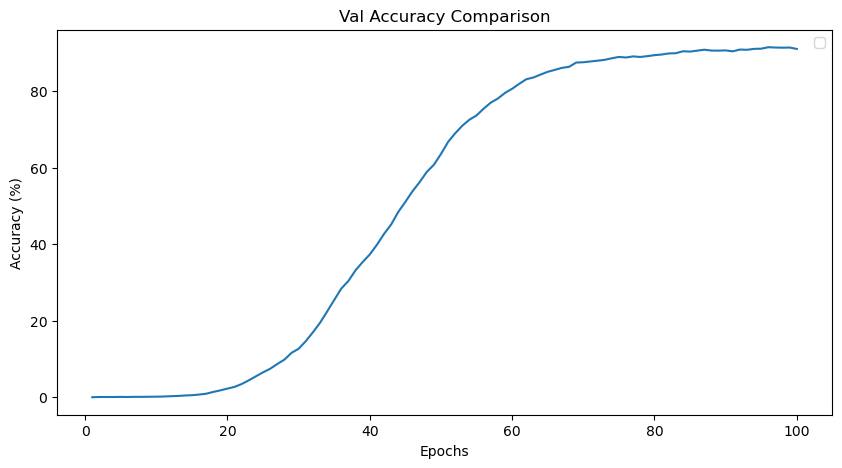

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), history['val_metrics'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Val Accuracy Comparison')
plt.legend()
plt.show()

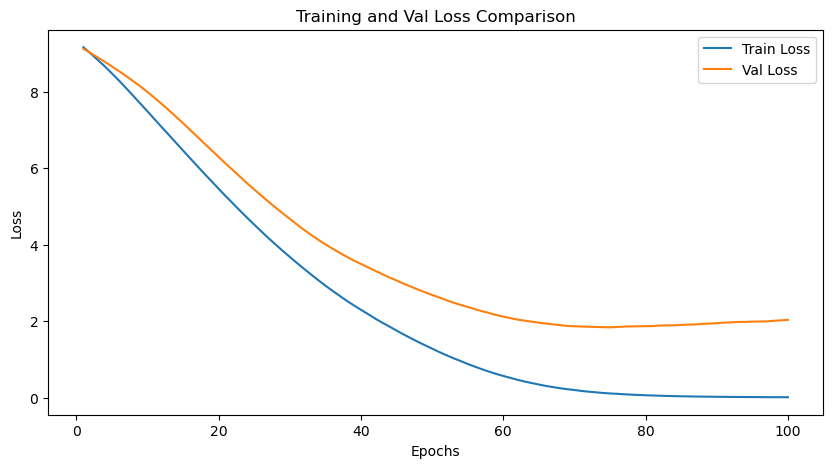

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), history['train_loss'], label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Val Loss Comparison')
plt.legend()
plt.show()